# Analyzing networks in Python
Some of the codes are adapted from https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience, Chapter 1-2.

# Import modules

In [ ]:
import networkx as nx

import pandas as pd
import matplotlib.pyplot as plt
import urllib, json

## Loading a Network
### House Graph example
https://networkx.org/documentation/stable/auto_examples/drawing/plot_house_with_colors.html

In [ ]:
HG = nx.house_graph()

In [ ]:
## Nodes
HG.nodes()

NodeView((0, 1, 2, 3, 4))

In [ ]:
## Edges
HG.edges()

EdgeView([(0, 1), (0, 2), (1, 3), (2, 3), (2, 4), (3, 4)])

## Types of Representations

### Edge List

In [ ]:
list( HG.edges() )

[(0, 1), (0, 2), (1, 3), (2, 3), (2, 4), (3, 4)]

### Adjacency Matrix

In [ ]:
ADJ = nx.to_pandas_adjacency(HG)
ADJ

,0,1,2,3,4
0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,1.0
3,0.0,1.0,1.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0


### Node-edge list

In [ ]:
nx.to_dict_of_lists(HG)

{0: [1, 2], 1: [0, 3], 2: [0, 3, 4], 3: [1, 2, 4], 4: [2, 3]}

## Visualization example
https://networkx.org/documentation/stable/auto_examples/drawing/plot_house_with_colors.html

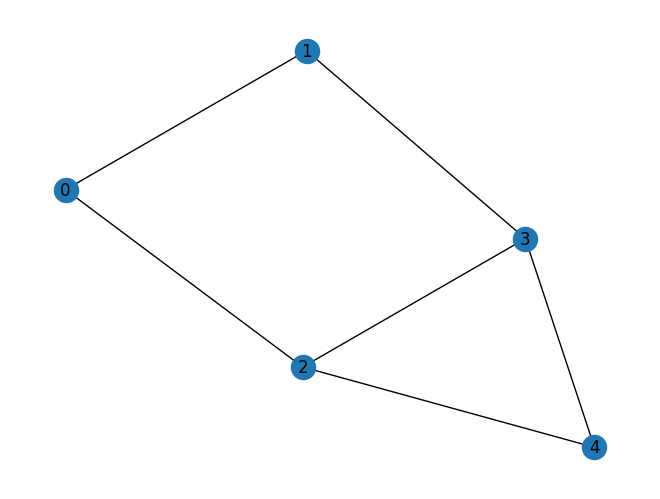

In [ ]:
# draw the graph
nx.draw(HG, with_labels=True)

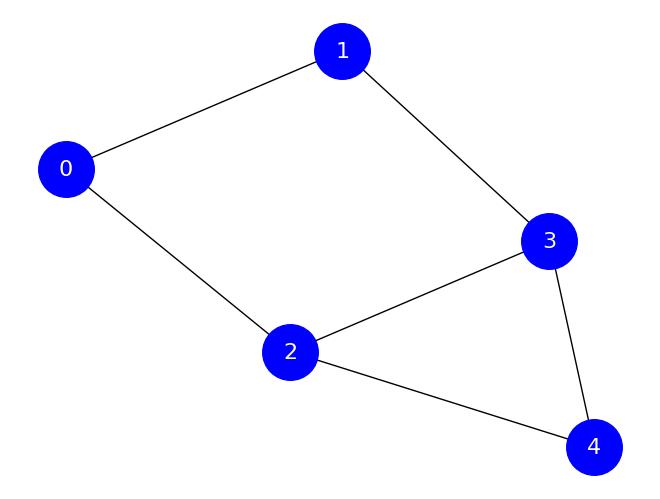

In [ ]:
nx.draw(HG,
        with_labels=True,
        node_color='blue',
        node_size=1600,
        font_color='white',
        font_size=16,
        )

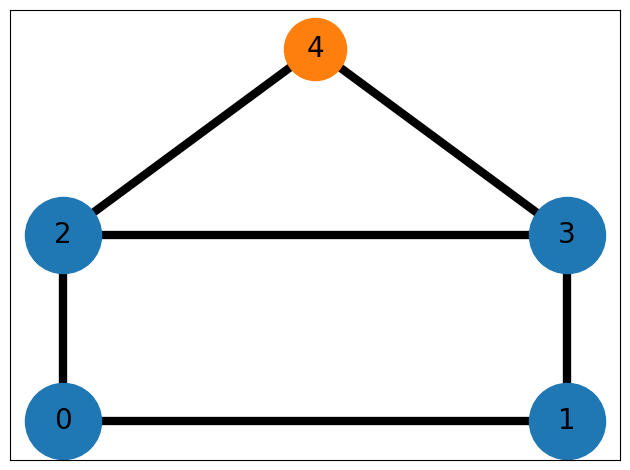

In [ ]:
pos = {0: (0, 0), 1: (1, 0), 2: (0, 1), 3: (1, 1), 4: (0.5, 2.0)}
nx.draw_networkx_nodes(
    HG, pos, node_size=3000, nodelist=[0, 1, 2, 3], node_color="tab:blue"
)
nx.draw_networkx_nodes(HG, pos, node_size=2000, nodelist=[4], node_color="tab:orange")
nx.draw_networkx_edges(HG, pos, alpha=1, width=6)
nx.draw_networkx_labels(HG, pos, font_size=20)

plt.tight_layout()

# Graph methods

In [ ]:
# nodes (iterator)
HG.nodes()

NodeView((0, 1, 2, 3, 4))

In [ ]:
# edges (iterator)
HG.edges()

EdgeView([(0, 1), (0, 2), (1, 3), (2, 3), (2, 4), (3, 4)])

In [ ]:
len(HG.nodes()) == HG.number_of_nodes()

True

In [ ]:
len(HG.edges()) == HG.number_of_edges()

True

In [ ]:
# Let's see neighbors of a certain node
HG.neighbors(1)

In [ ]:
nx.to_dict_of_lists(HG)[1]

[0, 3]

In [ ]:
[neighbor for neighbor in HG.neighbors(1)] == nx.to_dict_of_lists(HG)[1]

True

In [ ]:
HG.degree(1) == len(nx.to_dict_of_lists(HG)[1])

True

# Directed graphs

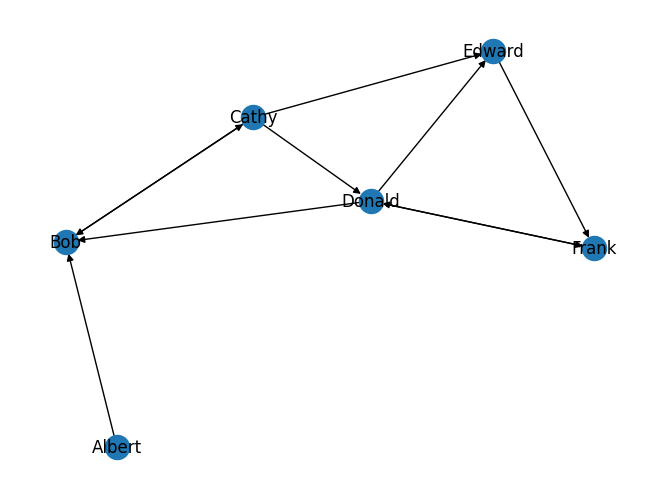

In [ ]:
D = nx.DiGraph()

D.add_edges_from([('Albert','Bob'),('Bob', 'Cathy'),('Cathy','Bob'),('Cathy','Donald'),
 ('Cathy', 'Edward'),('Donald','Edward'),('Donald','Frank'),('Edward','Frank'),('Frank','Donald'),('Donald','Bob')])

nx.draw(D, with_labels=True)

In [ ]:
D.has_edge('Albert','Bob'), D.has_edge('Bob','Albert'),

(True, False)

In [ ]:
D.in_degree('Bob')

3

In [ ]:
D.out_degree('Bob')

1

## Some Metrics

Network density

In [ ]:
nx.density(HG)

0.6

In [ ]:
nx.density(D)

0.3333333333333333

Degree centrality

In [ ]:
nx.degree_centrality(HG)

{0: 0.5, 1: 0.5, 2: 0.75, 3: 0.75, 4: 0.5}

In [ ]:
nx.in_degree_centrality(D)

{'Albert': 0.0,
 'Bob': 0.6000000000000001,
 'Cathy': 0.2,
 'Donald': 0.4,
 'Edward': 0.4,
 'Frank': 0.4}

In [ ]:
nx.out_degree_centrality(D)

{'Albert': 0.2,
 'Bob': 0.2,
 'Cathy': 0.6000000000000001,
 'Donald': 0.6000000000000001,
 'Edward': 0.2,
 'Frank': 0.2}

Shortest path



In [ ]:
nx.shortest_path(HG,0,4)

[0, 2, 4]

In [ ]:
nx.shortest_path(D, 'Edward', 'Bob')

['Edward', 'Frank', 'Donald', 'Bob']

Betweenness centrality

In [ ]:
nx.betweenness_centrality(HG, normalized=False)

{0: 0.5, 1: 0.5, 2: 1.5, 3: 1.5, 4: 0.0}

In [ ]:
nx.betweenness_centrality(D, normalized=False)

{'Albert': 0.0,
 'Bob': 7.0,
 'Cathy': 6.0,
 'Donald': 6.5,
 'Edward': 1.5,
 'Frank': 3.0}

# Les Miserables Graph
*   Nodes: Each of the characters in Les Miserables.
*   Edges: Pairs of characters co-appearing in the same chapter(s).  
https://github.com/plotly/datasets

In [ ]:
lemis_url = 'https://raw.githubusercontent.com/plotly/datasets/master/miserables.json'
with urllib.request.urlopen(lemis_url) as url:
    raw_data = json.loads(url.read().decode())

In [ ]:
nodes = raw_data['nodes']
edges = raw_data['links']

In [ ]:
import pandas as pd
nodes_df = pd.DataFrame(nodes)
nodes_df.to_csv('nodes.csv', index=False)

In [ ]:
nodelist = list(nodes_df['name'])
nodelist

['Myriel',
 'Napoleon',
 'Mlle.Baptistine',
 'Mme.Magloire',
 'CountessdeLo',
 'Geborand',
 'Champtercier',
 'Cravatte',
 'Count',
 'OldMan',
 'Labarre',
 'Valjean',
 'Marguerite',
 'Mme.deR',
 'Isabeau',
 'Gervais',
 'Tholomyes',
 'Listolier',
 'Fameuil',
 'Blacheville',
 'Favourite',
 'Dahlia',
 'Zephine',
 'Fantine',
 'Mme.Thenardier',
 'Thenardier',
 'Cosette',
 'Javert',
 'Fauchelevent',
 'Bamatabois',
 'Perpetue',
 'Simplice',
 'Scaufflaire',
 'Woman1',
 'Judge',
 'Champmathieu',
 'Brevet',
 'Chenildieu',
 'Cochepaille',
 'Pontmercy',
 'Boulatruelle',
 'Eponine',
 'Anzelma',
 'Woman2',
 'MotherInnocent',
 'Gribier',
 'Jondrette',
 'Mme.Burgon',
 'Gavroche',
 'Gillenormand',
 'Magnon',
 'Mlle.Gillenormand',
 'Mme.Pontmercy',
 'Mlle.Vaubois',
 'Lt.Gillenormand',
 'Marius',
 'BaronessT',
 'Mabeuf',
 'Enjolras',
 'Combeferre',
 'Prouvaire',
 'Feuilly',
 'Courfeyrac',
 'Bahorel',
 'Bossuet',
 'Joly',
 'Grantaire',
 'MotherPlutarch',
 'Gueulemer',
 'Babet',
 'Claquesous',
 'Montparnass

In [ ]:
edges_df = pd.DataFrame(edges)
edges_df.to_csv('edges.csv', index=False)

In [ ]:
edgelist = [(row["source"], row["target"]) for _, row in edges_df.iterrows()]
edgelist

[(1, 0),
 (2, 0),
 (3, 0),
 (3, 2),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 0),
 (11, 10),
 (11, 3),
 (11, 2),
 (11, 0),
 (12, 11),
 (13, 11),
 (14, 11),
 (15, 11),
 (17, 16),
 (18, 16),
 (18, 17),
 (19, 16),
 (19, 17),
 (19, 18),
 (20, 16),
 (20, 17),
 (20, 18),
 (20, 19),
 (21, 16),
 (21, 17),
 (21, 18),
 (21, 19),
 (21, 20),
 (22, 16),
 (22, 17),
 (22, 18),
 (22, 19),
 (22, 20),
 (22, 21),
 (23, 16),
 (23, 17),
 (23, 18),
 (23, 19),
 (23, 20),
 (23, 21),
 (23, 22),
 (23, 12),
 (23, 11),
 (24, 23),
 (24, 11),
 (25, 24),
 (25, 23),
 (25, 11),
 (26, 24),
 (26, 11),
 (26, 16),
 (26, 25),
 (27, 11),
 (27, 23),
 (27, 25),
 (27, 24),
 (27, 26),
 (28, 11),
 (28, 27),
 (29, 23),
 (29, 27),
 (29, 11),
 (30, 23),
 (31, 30),
 (31, 11),
 (31, 23),
 (31, 27),
 (32, 11),
 (33, 11),
 (33, 27),
 (34, 11),
 (34, 29),
 (35, 11),
 (35, 34),
 (35, 29),
 (36, 34),
 (36, 35),
 (36, 11),
 (36, 29),
 (37, 34),
 (37, 35),
 (37, 36),
 (37, 11),
 (37, 29),
 (38, 34),
 (38, 35),
 (38, 36),
 (38, 37),


In [ ]:
edgelist = [(nodelist[a], nodelist[b]) for a, b in edgelist]
edgelist

[('Napoleon', 'Myriel'),
 ('Mlle.Baptistine', 'Myriel'),
 ('Mme.Magloire', 'Myriel'),
 ('Mme.Magloire', 'Mlle.Baptistine'),
 ('CountessdeLo', 'Myriel'),
 ('Geborand', 'Myriel'),
 ('Champtercier', 'Myriel'),
 ('Cravatte', 'Myriel'),
 ('Count', 'Myriel'),
 ('OldMan', 'Myriel'),
 ('Valjean', 'Labarre'),
 ('Valjean', 'Mme.Magloire'),
 ('Valjean', 'Mlle.Baptistine'),
 ('Valjean', 'Myriel'),
 ('Marguerite', 'Valjean'),
 ('Mme.deR', 'Valjean'),
 ('Isabeau', 'Valjean'),
 ('Gervais', 'Valjean'),
 ('Listolier', 'Tholomyes'),
 ('Fameuil', 'Tholomyes'),
 ('Fameuil', 'Listolier'),
 ('Blacheville', 'Tholomyes'),
 ('Blacheville', 'Listolier'),
 ('Blacheville', 'Fameuil'),
 ('Favourite', 'Tholomyes'),
 ('Favourite', 'Listolier'),
 ('Favourite', 'Fameuil'),
 ('Favourite', 'Blacheville'),
 ('Dahlia', 'Tholomyes'),
 ('Dahlia', 'Listolier'),
 ('Dahlia', 'Fameuil'),
 ('Dahlia', 'Blacheville'),
 ('Dahlia', 'Favourite'),
 ('Zephine', 'Tholomyes'),
 ('Zephine', 'Listolier'),
 ('Zephine', 'Fameuil'),
 ('Zephin

### Create a networkx object with the information above
https://networkx.org/documentation/networkx-1.0/tutorial/tutorial.html

In [ ]:
LM_G = nx.Graph()
LM_G.add_edges_from(edgelist)

In [ ]:
LM_G.number_of_nodes()

77

In [ ]:
LM_G.degree('Valjean')

36

In [ ]:
[neighbor for neighbor in LM_G.neighbors('Valjean')]

['Labarre',
 'Mme.Magloire',
 'Mlle.Baptistine',
 'Myriel',
 'Marguerite',
 'Mme.deR',
 'Isabeau',
 'Gervais',
 'Fantine',
 'Mme.Thenardier',
 'Thenardier',
 'Cosette',
 'Javert',
 'Fauchelevent',
 'Bamatabois',
 'Simplice',
 'Scaufflaire',
 'Woman1',
 'Judge',
 'Champmathieu',
 'Brevet',
 'Chenildieu',
 'Cochepaille',
 'Woman2',
 'MotherInnocent',
 'Gavroche',
 'Gillenormand',
 'Mlle.Gillenormand',
 'Marius',
 'Enjolras',
 'Bossuet',
 'Gueulemer',
 'Babet',
 'Claquesous',
 'Montparnasse',
 'Toussaint']

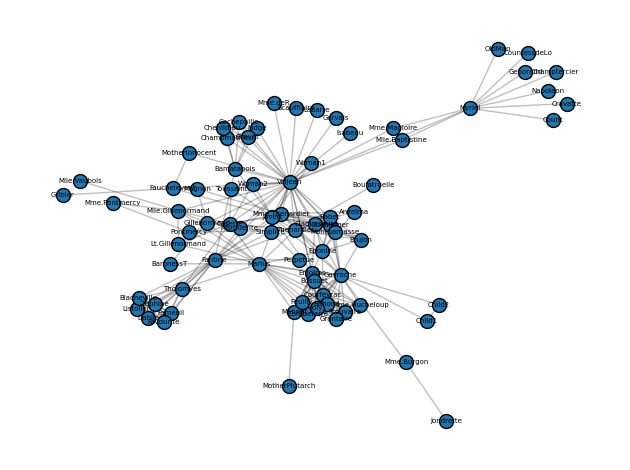

In [ ]:
ax = plt.subplots()

pos = nx.spring_layout(LM_G, seed=200)
nx.draw_networkx_edges(LM_G, pos, alpha=0.25, width=1)
nx.draw_networkx_nodes(LM_G, pos, node_size=100).set_edgecolor('black')

# Add labels to the nodes
labels = {node: str(node) for node in LM_G.nodes()}  # Replace str(node) with your actual labels
nx.draw_networkx_labels(LM_G, pos, labels, font_size=5, font_color='black')

plt.tight_layout()
plt.axis("off")
plt.show()

In [ ]:
df = pd.DataFrame( nx.degree(LM_G), columns=['node', 'degree'] )
df.sort_values('degree', ascending=False)

,node,degree
10,Valjean,36
48,Gavroche,22
55,Marius,19
27,Javert,17
25,Thenardier,16
...,...,...
13,Mme.deR,1
14,Isabeau,1
15,Gervais,1
32,Scaufflaire,1


In [ ]:
nx.degree_centrality(LM_G)['Valjean']

0.47368421052631576

In [ ]:
nx.betweenness_centrality(LM_G)['Valjean']

0.5699890527836184

In [ ]:
nx.closeness_centrality(LM_G)['Valjean']

0.6440677966101694

In [ ]:
nx.eigenvector_centrality(LM_G)['Valjean']

0.2676181759885394

In [ ]:
betweenness_dict = nx.betweenness_centrality(LM_G)

for _, row in df.iterrows():
    character = row['node']
    degree = betweenness_dict[character]
    df.loc[df['node'] == character, 'betweenness'] = degree

In [ ]:
df.sort_values('betweenness', ascending=False)

,node,degree,betweenness
10,Valjean,36,0.569989
1,Myriel,10,0.176842
48,Gavroche,22,0.165113
55,Marius,19,0.132032
23,Fantine,15,0.129645
...,...,...,...
36,Brevet,6,0.000000
37,Chenildieu,6,0.000000
40,Boulatruelle,1,0.000000
42,Anzelma,3,0.000000


# Visualize using PyVis
Documentation: https://pyvis.readthedocs.io/en/latest/tutorial.html#getting-started

In [ ]:
!pip install pyvis
from pyvis.network import Network
from IPython.core.display import display, HTML

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 4.1 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
net = Network(notebook=True, cdn_resources='remote')
net.from_nx(LM_G)

In [ ]:
net.show_buttons(filter_=['nodes', 'edges'])

In [ ]:
# Save to an HTML file
net_file = "graph.html"
net.save_graph(net_file)

# Display the saved HTML within Colab
display(HTML(filename=net_file))

# Visualize with netwulf (local only, not on Google CoLab)
Documentation: https://netwulf.readthedocs.io/en/latest/

In [ ]:
!pip install netwulf

In [ ]:
from netwulf import visualize
import netwulf as nw

stylized_network, config = visualize(LM_G,)

# On your Own:
By running below code, you will get a NetworkX object FT_G that contains the network of American football games between Division IA colleges during regular season Fall 2000. (https://networkx.org/documentation/stable/auto_examples/graph/plot_football.html)

(1) How many nodes and edges are there?  
(2) What is the name of the node with the highest degree?  
(3) What is the name of the node with the highest {degree, betweenness, closeness, eigenvector} centrality?  
(4) Calculate the shortest path length between SouthernCalifornia and any other university that you pick.  
(5) Visualize the network. How does it look compared to Les Miserables graph?

In [1]:
import urllib.request
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
FT_G = nx.parse_gml(gml)  # parse gml data